<div style="display: flex;">
  <div style="flex: 1; padding: 8px;">
    <h1>Bloch Sphere and Rotations</h1>
    Prepared by Iskender Yalcinkaya
  </div>
  <div style="flex: 1; text-align: right; padding: 8px;">
    <img src="./logos/logo-cvut.jpg" alt="LOGO-CVUT" width="200" align="right">
    <img src="./logos/logo-fjfi.png" alt="LOGO-FJFI" width="100" align="right">
  </div>
</div>

### Bloch sphere representation of an arbitrary qubit

An arbitrary qubit can be parametrized by $(\theta,\phi)$ representing the points on the unit sphere called the Bloch sphere,
$$
\left|\psi\right>=\cos\frac{\theta}{2}\left|0\right>+e^{i\phi}\sin\frac{\theta}{2}\left|1\right>
$$
where $\theta\in [0,\pi]$ and $\phi\in [0,2\pi)$.

### Plotting a vector on the Bloch sphere in Qiskit 

To plot a vector on the Bloch sphere, we use `plot_bloch_vector(coordinates,coord_type)` command. While the parameter `coord_type` can have two different values `'spherical'` or `'cartesian'`, `coordinates` is a three dimensional vector specifying the coordinates of the bloch vector in the relevant coordinates. For example, to draw a unit vector along x-axis, the minimal code is given as

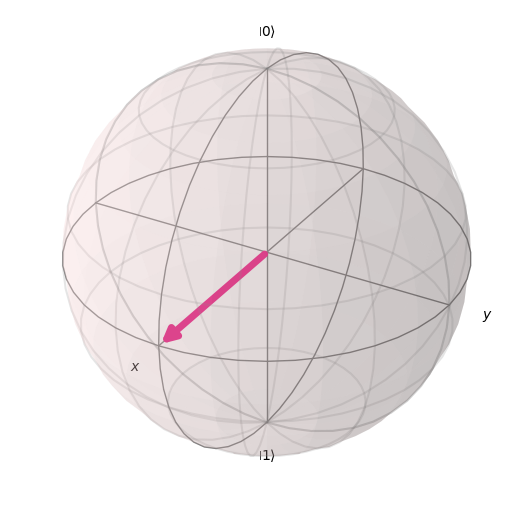

In [1]:
from qiskit.visualization import plot_bloch_vector 
from math import sin,cos,pi
coord=[1,0,0]
plot_bloch_vector(coord) # coord_type='cartesian' is default

Similarly, a vector on x-y plane can be plotted in the spherical coordinates as

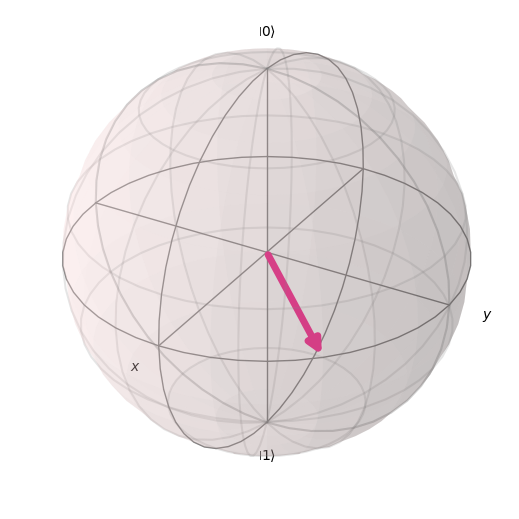

In [4]:
from qiskit.visualization import plot_bloch_vector 
from math import sin,cos,pi
coord=[1,pi/2,pi/4]
plot_bloch_vector(coord,coord_type='spherical')

### Standard rotations in Qiskit

The standard rotations $R_x(\theta)$, $R_y(\theta)$, and $R_z(\theta)$ are realized by the commands `qc.rx(...)`,`qc.ry(...)` and `qc.rz(...)`, respectively, where `qc` is a quantum circuit object as we have defined in the previous lecture. Rotations are, yet again, single qubit gates. In the following, you can find an example code, where an initial $\left|0\right>$ state is rotated about y and z axes by $\pi/4$.

{'0': 870, '1': 154}


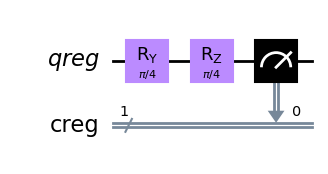

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

q = QuantumRegister(1,"qreg")
c = ClassicalRegister(1,"creg")

qc = QuantumCircuit(q,c)
qc.ry(pi/4,q[0])
qc.rz(pi/4,q[0])
qc.measure(q[0],c[0])

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
counts = job.result().get_counts(qc)
print(counts)
qc.draw(output='mpl')

### Statevector function in Qiskit

In Qiskit library, it is possible read the state of a quantum circuit with `Statevector`  object.  It is also possible to plot a state on the Bloch sphere directly with `plot_bloch_multivector(state)` function.

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


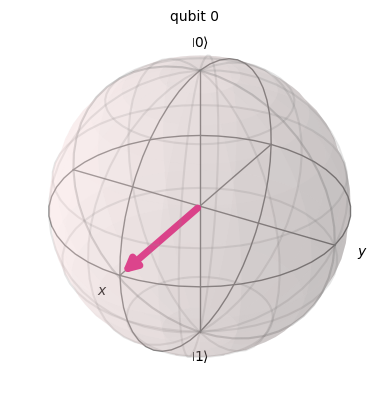

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector # call Statevector object from qiskit library
from qiskit.visualization import plot_bloch_multivector # call plot_bloch_multivector function from qiskit library 
%matplotlib inline

qc = QuantumCircuit(1)
qc.h(0)

state = Statevector.from_instruction(qc) # stores the current state of the quantum circuit (and its dimension) in 'state' variable as an array.
print(state)
plot_bloch_multivector(state)

### Assignments

**(1)** Write quantum circuits that  qubit states transform the initial $\left|0\right>$ state into the states described by Bloch vectors at angles $(\theta,\phi)$:  
(a) $(0,0)$,  
(b) $(0,\pi/2)$,  
(c) $(\pi/4,0)$,  
(d) $(\pi/4,\pi/2)$,  
(e) $(\pi/2,0)$ and  
(f) $(\pi/2,\pi/2)$.  
You may find the `Statevector` and `plot_bloch_multivector` functions useful to verify your result.

In [ ]:
# Your code goes here

**(2)** We can define circuits in qiskit that rotate an initial qubit in state $\left|0\right>$ by some rotation operator at a certain angle $\rho$. The `qasm_simulator` can be used to collect the measurement statistics that would be given by a quantum computer. Alternatively, we can use the `Statevector` function to obtain the state vector numerically.     
(a) Construct a circuit with a rotation about $x$ with $\rho=\pi/2$.    
(b) Construct a circuit with a rotation about $y$ by $\rho=\pi/2$.  
(c) Is there any difference between (a) and (b) in terms of the measurement statistics? Interpret your results and provide reasoning to justify them.        
(d) Construct a circuit with a rotation about rotation about y by $\pi/4$.      
(e) Take the code you wrote for (d) and add one more rotation about $z$ axis by $\pi/4$ following the already including $y$ rotation. Did the measurement statistics change compared to that of (d)?    
(f) Compare the measurement statistics and the probabilities obtained by the `Statevector` function. Explain your results.

In [ ]:
# Your code goes here

**(3)** Suppose that we know that $\left|0\right>$ qubit is rotated by an angle $\rho=\pi/4$, but we don't know if the axis of rotation was $x$ or $y$. How can we tell which axes it was? Use qiskit to demonstrate your solution, by implementing circuits that rotate around $x$ and $y$, respectively, and appending it by quantum or classical processing. (Do not use `Statevector` function)

In [ ]:
# Your code goes here

**(4)** Find the Z-Y decomposition for $H$ gate, and construct the quantum circuit that implements it. Find a way to verify that the circuit indeed implements the Hadamard gate.

In [ ]:
# Your code goes here